In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import seaborn as sns

In [39]:
# df_cc = pd.read_csv('C:/Users/Vikash/Documents/Python Scripts/Data_Mining/CC GENERAL.csv')
df_cc = pd.read_csv('/kaggle/input/creditcarddata/CC GENERAL.csv')

In [40]:
df_cc.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [41]:
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Pre-processing Data

<h3>Find Missing values

In [42]:
df_cc.isnull().sum().sort_values(ascending=False).head(4)


MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
dtype: int64

In [43]:
# Replace the missing values with mean value
df_cc.loc[(df_cc['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df_cc['MINIMUM_PAYMENTS'].mean()
df_cc.loc[(df_cc['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df_cc['CREDIT_LIMIT'].mean()
df_cc_all = df_cc[:]

<h3> Binning the values

In [44]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
         'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    Range=c + '_RANGE'
    df_cc[Range]=0        
    df_cc.loc[((df_cc[c]>0)&(df_cc[c]<=500)),Range]=1
    df_cc.loc[((df_cc[c]>500)&(df_cc[c]<=1000)),Range]=2
    df_cc.loc[((df_cc[c]>1000)&(df_cc[c]<=3000)),Range]=3
    df_cc.loc[((df_cc[c]>3000)&(df_cc[c]<=5000)),Range]=4
    df_cc.loc[((df_cc[c]>5000)&(df_cc[c]<=10000)),Range]=5
    df_cc.loc[(df_cc[c]>10000),Range]=6


df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.000000,12,1,1,0,1,0,2,1,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.222222,12,4,0,0,0,5,5,4,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,12,3,2,2,0,0,5,2,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,12,3,3,3,0,1,5,0,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.000000,12,2,1,1,0,0,3,2,1


In [45]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:    
    Range=c+'_RANGE'
    df_cc[Range]=0
    df_cc.loc[((df_cc[c]>0)&(df_cc[c]<=5)),Range]=1
    df_cc.loc[((df_cc[c]>5)&(df_cc[c]<=10)),Range]=2
    df_cc.loc[((df_cc[c]>10)&(df_cc[c]<=15)),Range]=3
    df_cc.loc[((df_cc[c]>15)&(df_cc[c]<=20)),Range]=4
    df_cc.loc[((df_cc[c]>20)&(df_cc[c]<=30)),Range]=5
    df_cc.loc[((df_cc[c]>30)&(df_cc[c]<=50)),Range]=6
    df_cc.loc[((df_cc[c]>50)&(df_cc[c]<=100)),Range]=7
    df_cc.loc[(df_cc[c]>100),Range]=8
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1,1,0,1,0,2,1,1,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,0,0,5,5,4,3,0,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,3,2,2,0,0,5,2,2,3,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,3,3,3,0,1,5,0,2,1,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,2,1,1,0,0,3,2,1,1,0


In [46]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df_cc[Range]=0
    df_cc.loc[((df_cc[c]>0)&(df_cc[c]<=0.1)),Range]=1
    df_cc.loc[((df_cc[c]>0.1)&(df_cc[c]<=0.2)),Range]=2
    df_cc.loc[((df_cc[c]>0.2)&(df_cc[c]<=0.3)),Range]=3
    df_cc.loc[((df_cc[c]>0.3)&(df_cc[c]<=0.4)),Range]=4
    df_cc.loc[((df_cc[c]>0.4)&(df_cc[c]<=0.5)),Range]=5
    df_cc.loc[((df_cc[c]>0.5)&(df_cc[c]<=0.6)),Range]=6
    df_cc.loc[((df_cc[c]>0.6)&(df_cc[c]<=0.7)),Range]=7
    df_cc.loc[((df_cc[c]>0.7)&(df_cc[c]<=0.8)),Range]=8
    df_cc.loc[((df_cc[c]>0.8)&(df_cc[c]<=0.9)),Range]=9
    df_cc.loc[((df_cc[c]>0.9)&(df_cc[c]<=1.0)),Range]=10

In [47]:
df_cc.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df_cc)

<h3> Normalising the values

In [48]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

<h3> Clustering - K-means

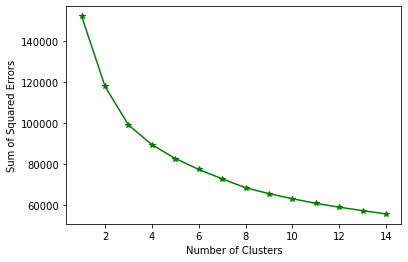

In [49]:
cluster_number = 15 
kmean_sq_value =[]
for i in range(1, cluster_number):
    kmean = KMeans(i)
    kmean.fit(X)
    kmean_sq_value.append([i, kmean.inertia_])

kmean_sq_value_df = pd.DataFrame(kmean_sq_value)
plt.plot(kmean_sq_value_df[0], kmean_sq_value_df[1], 'g*-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [50]:
# Let's choose n=7 as neither we want to have many cluster nor we see much improvement
# Adding the clusters
n_clusters = 7
kmean = KMeans(n_clusters).fit(X)
labels = kmean.labels_

In [51]:
# Convert labels to dataframe
df_labels = pd.DataFrame(labels)
df_labels.rename(columns={0: 'cluster'}, inplace=True)
df_clusters = df_cc.merge(df_labels, how="inner", left_index=True, right_index=True)

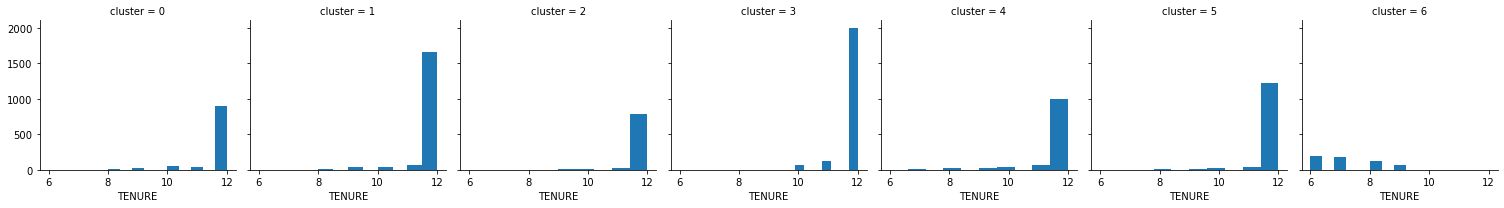

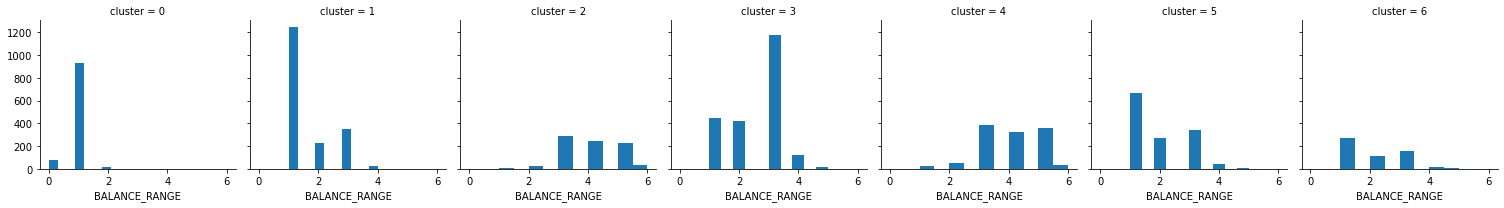

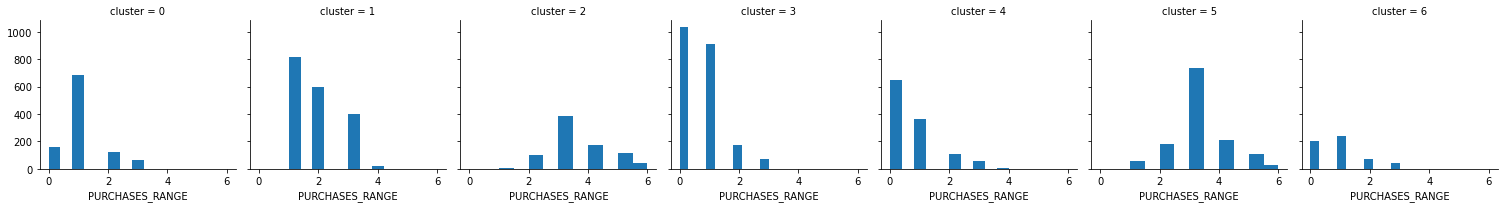

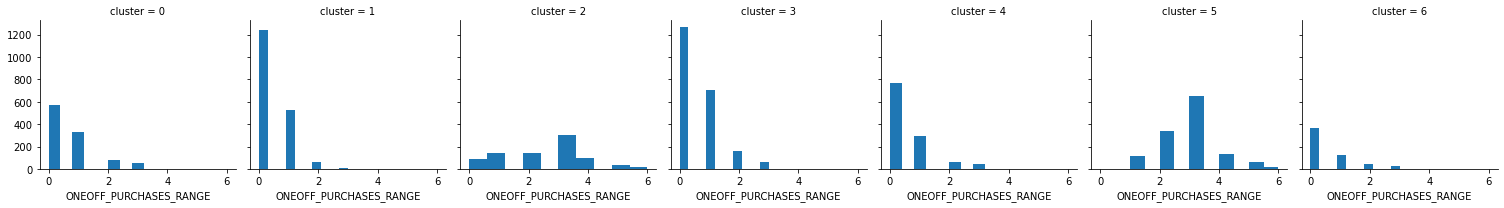

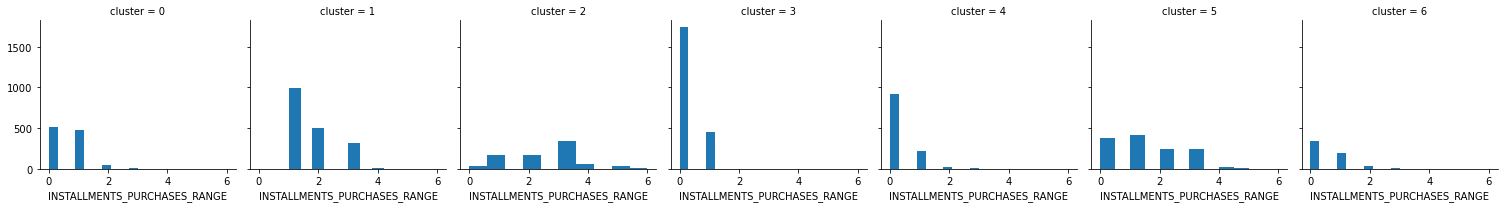

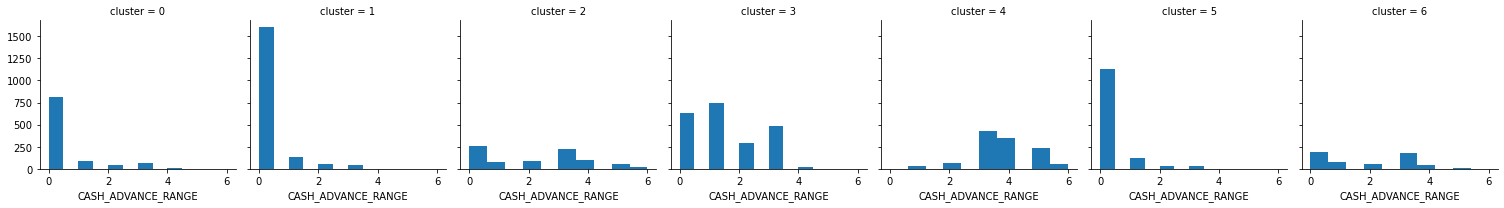

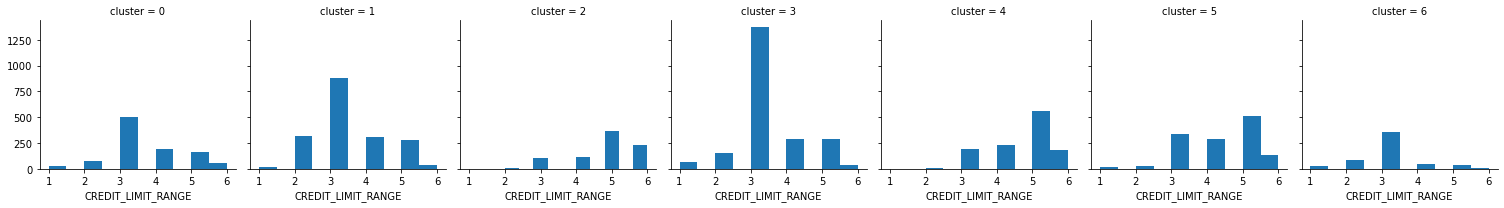

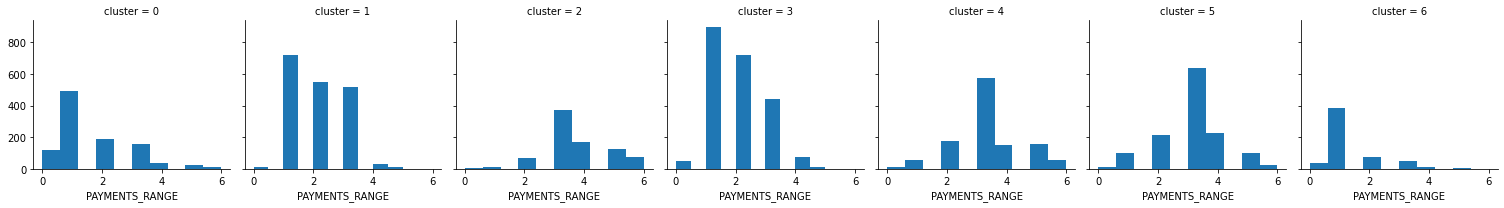

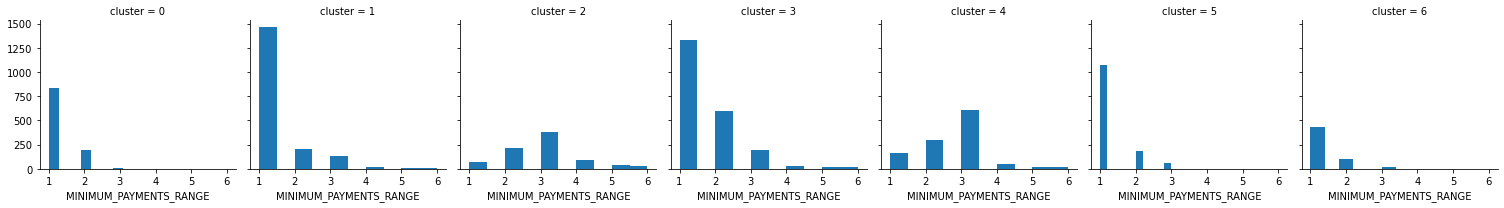

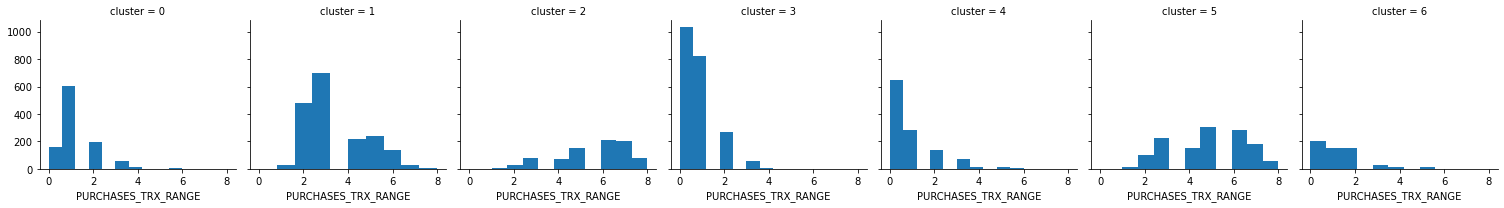

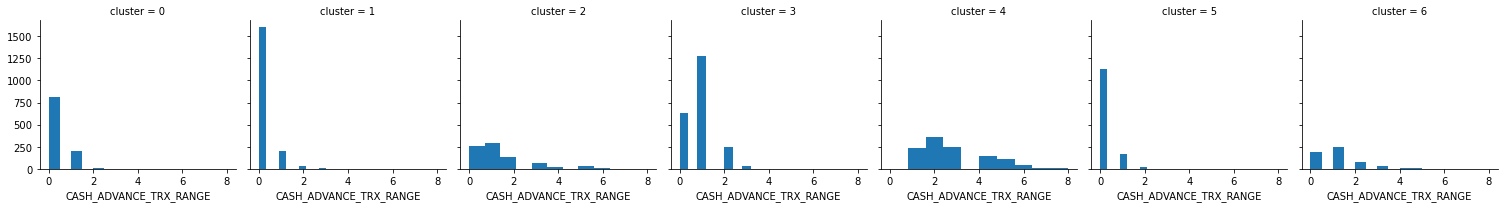

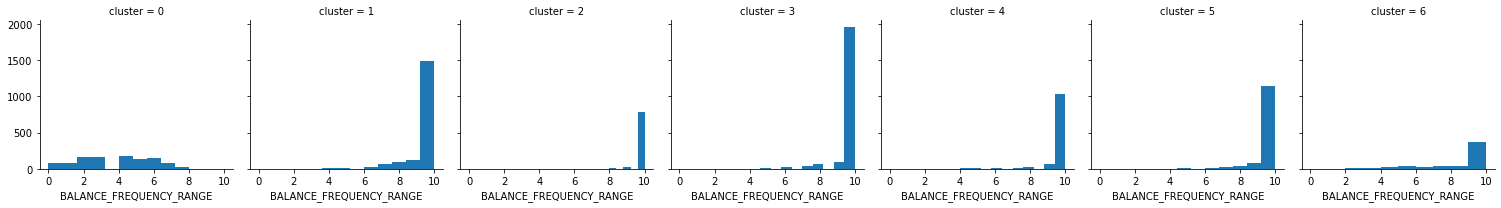

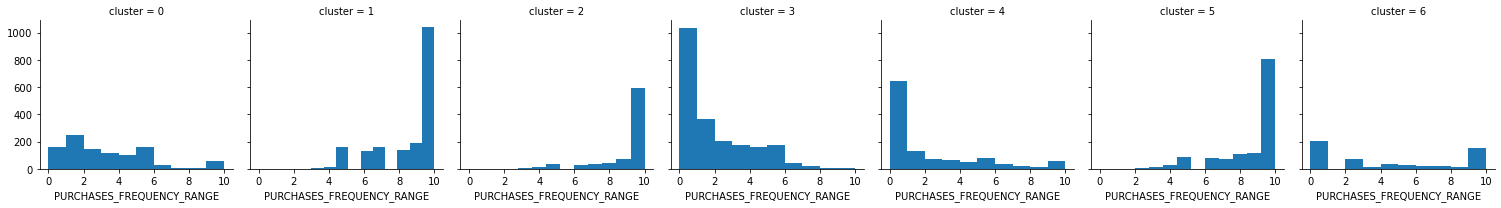

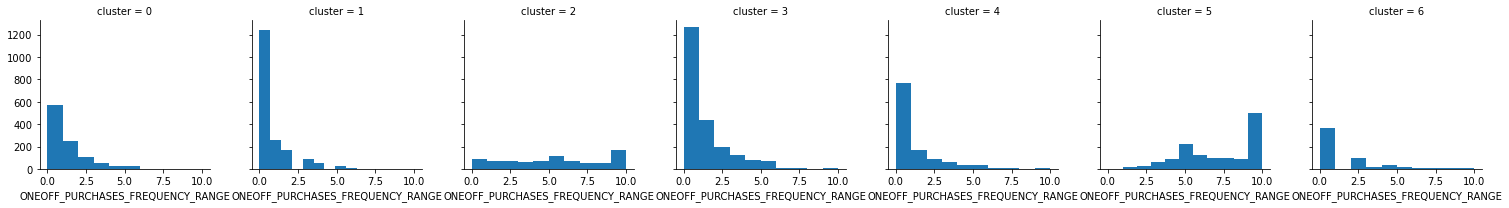

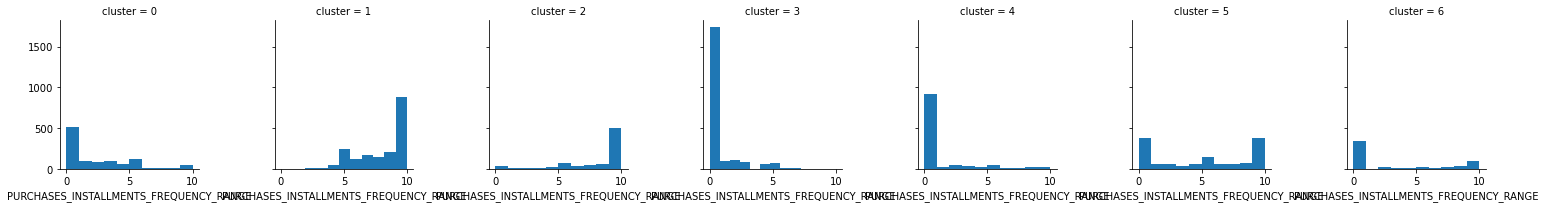

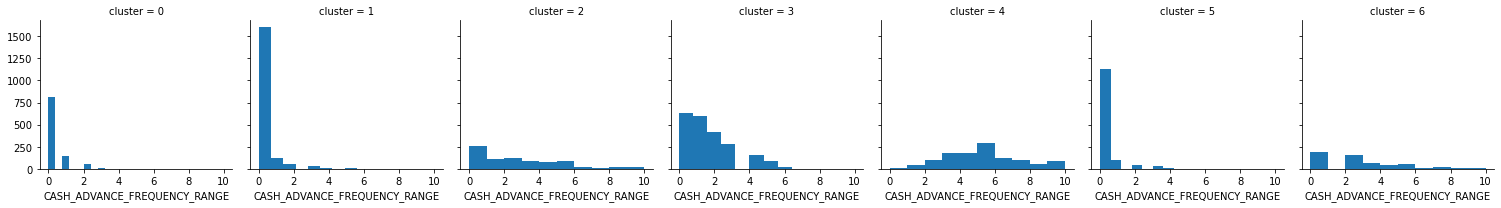

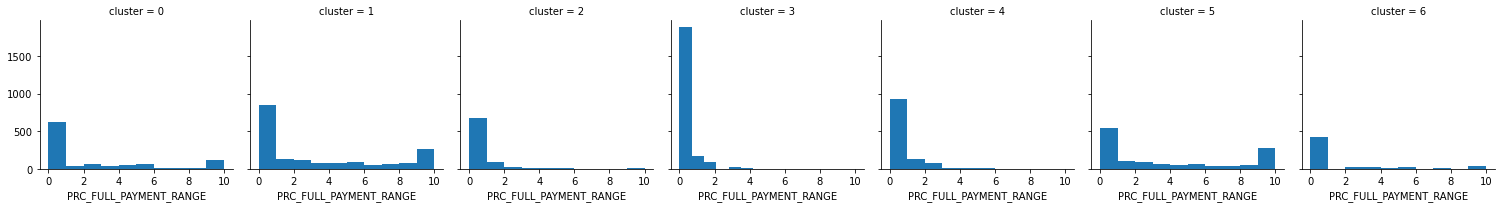

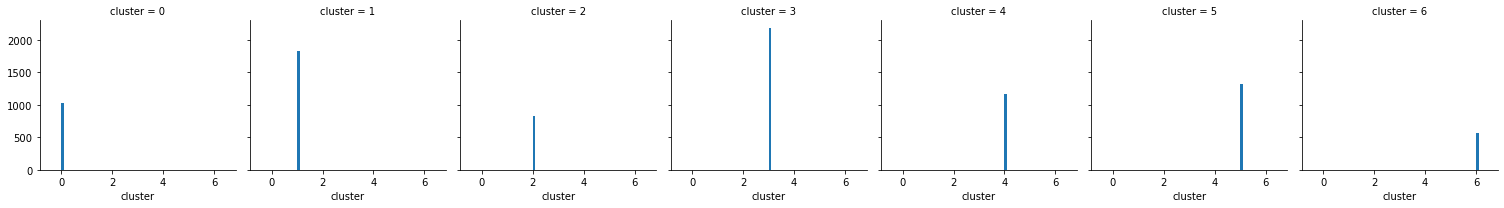

In [52]:
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='cluster')
    grid.map(plt.hist, c)

<H2> Visualization of clusters

In [53]:
#Normalize data
df_normalized = normalize(X)

#Reducing the dimension
pca = PCA(2)
X_PCA = pca.fit_transform(df_normalized)
X_PCA = pd.DataFrame(X_PCA)
X_PCA.columns = ['C1', 'C2']
X_PCA.head()

,C1,C2
0,-0.262007,-0.773873
1,-0.659363,0.518442
2,0.340332,0.267407
3,-0.227877,0.062221
4,-0.410027,-0.524627


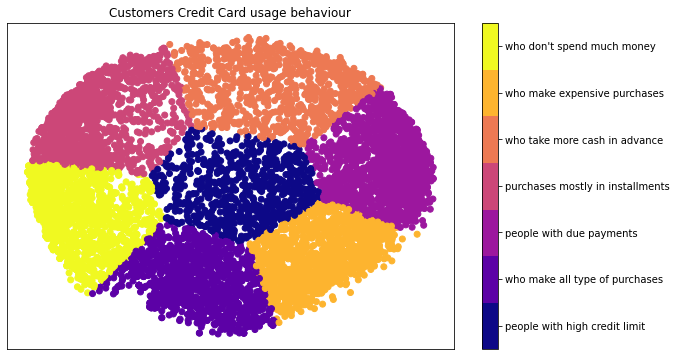

In [54]:
# Visualizing the cluster
cluster_groups = [
    [0, "people with high credit limit"],
    [1, "who make all type of purchases"], 
    [2, "people with due payments"],         
    [3, "purchases mostly in installments"],         
    [4, "who take more cash in advance"],          
    [5, "who make expensive purchases"],         
    [6, "who don't spend much money"]]

dfc = pd.DataFrame(KMeans(n_clusters).fit_predict(X_PCA))
dfc = dfc.rename(columns={0:'cluster_group'})
X_df = pd.concat([X_PCA, dfc], axis=1)

plt.subplots(figsize=(10, 6))
plt.scatter(X_df['C1'], X_df['C2'], c=X_df['cluster_group'],
cmap = plt.cm.get_cmap('plasma', 7))
plt.title("Customers Credit Card usage behaviour")

cbar = plt.colorbar()
plt.clim(-0.5, 6.5)
cbar.ax.set_yticklabels(x[1] for x in cluster_groups)
plt.axis("tight") 
plt.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()

# Regression

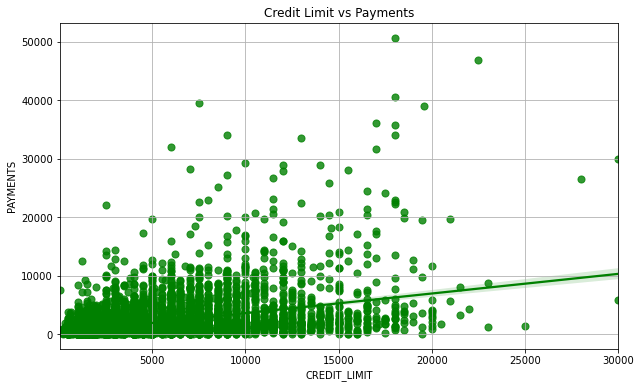

In [55]:
df_cc_limit_payments = df_cc_all[['CREDIT_LIMIT', 'PAYMENTS']]

plt.figure(figsize=(10, 6))
ax = sns.regplot(x='CREDIT_LIMIT', y='PAYMENTS', data=df_cc_limit_payments, color='green', marker='.', scatter_kws={'s': 200})
ax.set(xlabel='CREDIT_LIMIT', ylabel='PAYMENTS') 
ax.set_title('Credit Limit vs Payments') 
plt.grid(True)

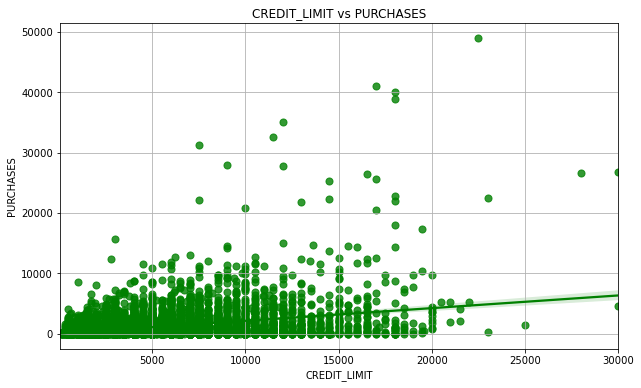

In [56]:
y_column = 'PURCHASES'
x_column = 'CREDIT_LIMIT'
columns = [x_column, y_column]
df_cc_limit_payments = df_cc_all[columns]

plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x_column, y=y_column, data=df_cc_limit_payments, color='green', marker='.', scatter_kws={'s': 200})
ax.set(xlabel=x_column, ylabel=y_column) 
ax.set_title( x_column + ' vs ' + y_column) 
plt.grid(True)

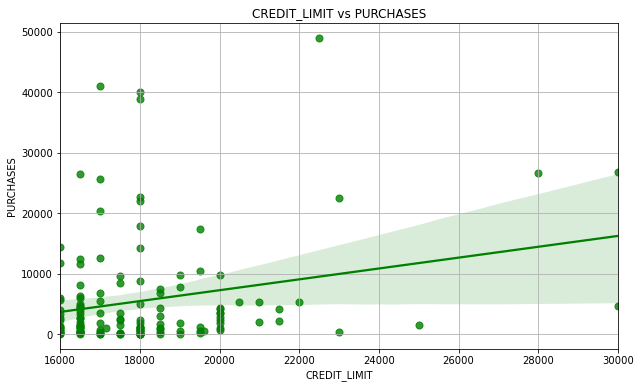

In [57]:
y_column = 'PURCHASES'
x_column = 'CREDIT_LIMIT'
columns = [x_column, y_column]
df_cc_limit_payments = df_cc_all[columns]
df_cc_limit_payments = df_cc_limit_payments[df_cc_limit_payments['CREDIT_LIMIT']>=16000]

plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x_column, y=y_column, data=df_cc_limit_payments, color='green', marker='.', scatter_kws={'s': 200})
ax.set(xlabel=x_column, ylabel=y_column) 
ax.set_title( x_column + ' vs ' + y_column) 
plt.grid(True)

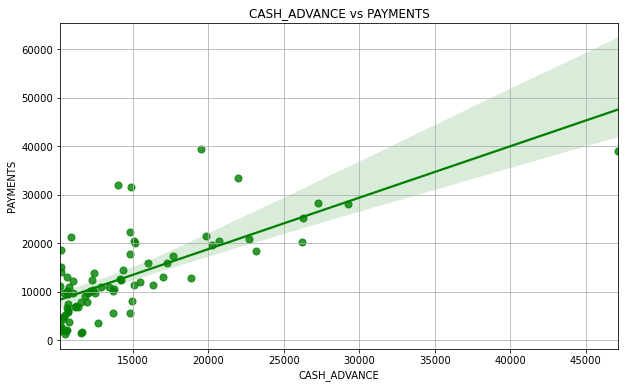

In [58]:
x_column = 'CASH_ADVANCE'
y_column = 'PAYMENTS'
columns = [x_column, y_column]
df_cc_limit_payments = df_cc_all[columns]
df_cc_limit_payments = df_cc_limit_payments[df_cc_limit_payments['CASH_ADVANCE']>=10000]
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=x_column, y=y_column, data=df_cc_limit_payments, color='green', marker='.', scatter_kws={'s': 200})

ax.set(xlabel=x_column, ylabel=y_column) 
ax.set_title( x_column + ' vs ' + y_column) 
plt.grid(True)